In [5]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  
from datetime import datetime  

In [6]:
file_path = "/kaggle/input/my-project-2/restaurant_sales_dataset.csv"  
df = pd.read_csv(file_path)  

In [7]:
print("Dataset Overview:\n", df.head())
df.info()
print("\nSummary Statistics:\n", df.describe())
df['Date'] = pd.to_datetime(df['Date'])
df['Order_Month'] = df['Date'].dt.to_period('M')

Dataset Overview:
    Order_ID                 Date  Customer_ID  Menu_Item_ID  \
0         1  2024-09-05 07:53:23            4             4   
1         1  2024-02-13 05:40:50            4             4   
2         2  2024-01-10 17:07:01            1             2   
3         2  2024-10-14 23:45:05            1             2   
4         2  2024-04-16 19:27:32            1             1   

        Menu_Item_Name     Category  Price  Quantity  Total_Price  \
0           Limoncello     Beverage  12.58         3        37.74   
1           Cappuccino     Beverage   8.28         1         8.28   
2      Chicken Alfredo  Main Course  15.15         2        30.30   
3  Spaghetti Carbonara  Main Course  16.05         2        32.10   
4    Stuffed Mushrooms    Appetizer   9.13         2        18.26   

  Restaurant_Location  Payment_Method Delivery_Status  
0              Suburb  Online Payment       Picked Up  
1              Suburb     Credit Card       Picked Up  
2            Downto

In [8]:
df['Day_of_Week'] = df['Date'].dt.day_name()
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)
category_sales = df.groupby('Category')['Total_Price'].sum().sort_values(ascending=False)
print("\nSales by Category:\n", category_sales)


Missing Values:
 Order_ID               0
Date                   0
Customer_ID            0
Menu_Item_ID           0
Menu_Item_Name         0
Category               0
Price                  0
Quantity               0
Total_Price            0
Restaurant_Location    0
Payment_Method         0
Delivery_Status        0
Order_Month            0
Day_of_Week            0
dtype: int64

Sales by Category:
 Category
Main Course    9998.05
Dessert        8838.51
Appetizer      8009.24
Beverage       6824.38
Name: Total_Price, dtype: float64


In [9]:
popular_items = df.groupby('Menu_Item_Name')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nMost Popular Items:\n", popular_items)
payment_methods = df['Payment_Method'].value_counts()
print("\nPayment Method Distribution:\n", payment_methods)


Most Popular Items:
 Menu_Item_Name
Garlic Bread           290
Cappuccino             279
Bruschetta             278
Limoncello             267
Spaghetti Carbonara    266
Tiramisu               253
Stuffed Mushrooms      250
Margherita Pizza       247
Chicken Alfredo        242
Gelato                 239
Name: Quantity, dtype: int64

Payment Method Distribution:
 Payment_Method
Online Payment    554
Credit Card       495
Cash              438
Name: count, dtype: int64


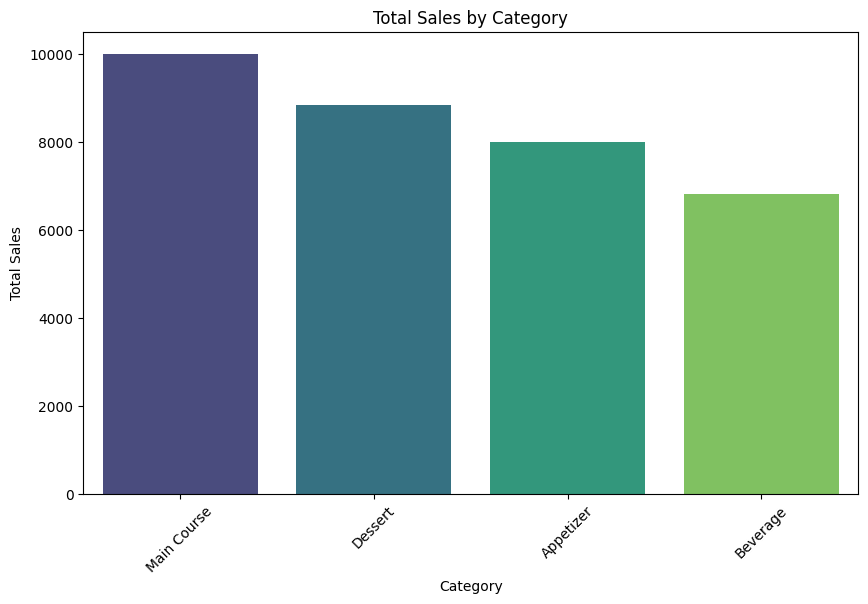

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="viridis")
plt.title('Total Sales by Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

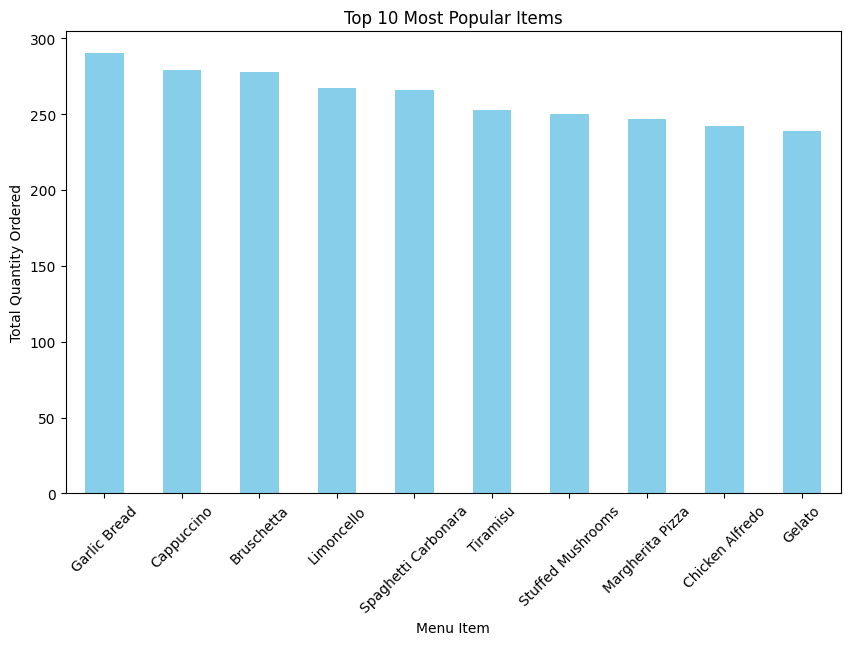

In [11]:
plt.figure(figsize=(10, 6))
popular_items.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Items')
plt.ylabel('Total Quantity Ordered')
plt.xlabel('Menu Item')
plt.xticks(rotation=45)
plt.show()

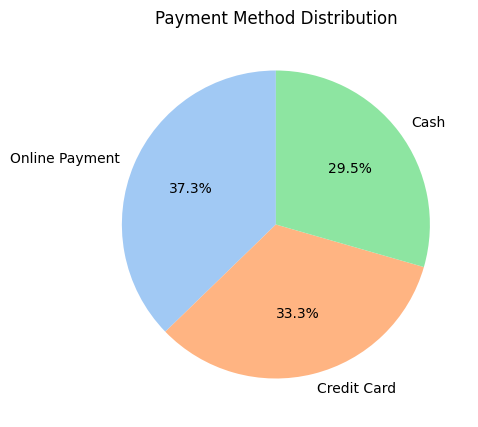

In [12]:
plt.figure(figsize=(8, 5))
payment_methods.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

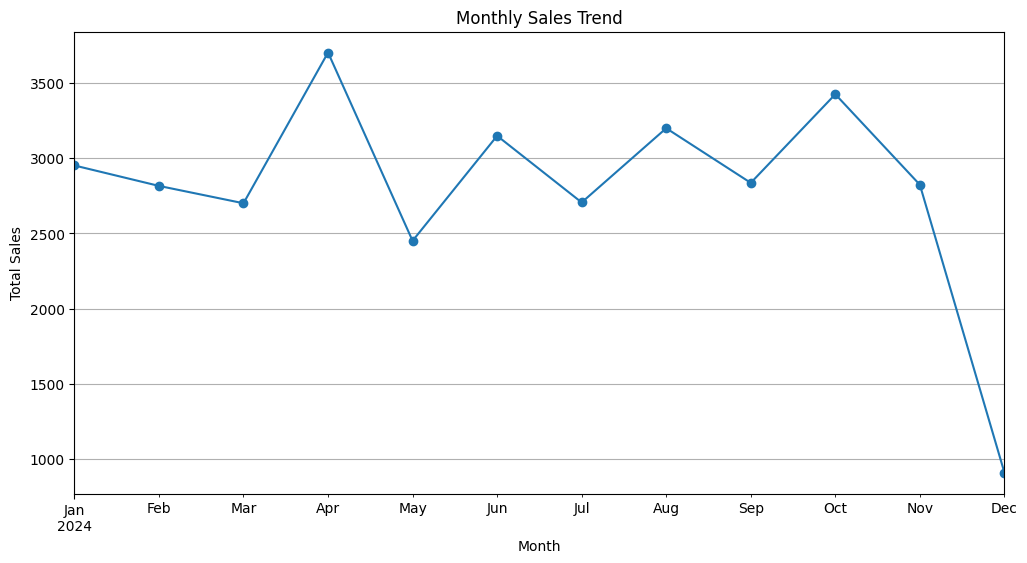

In [13]:
monthly_sales = df.groupby('Order_Month')['Total_Price'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid()
plt.show()

In [14]:
category_sales.to_csv("category_sales.csv", index=True)
popular_items.to_csv("popular_items.csv", index=True)
